# Testing vapourpressure Calculations

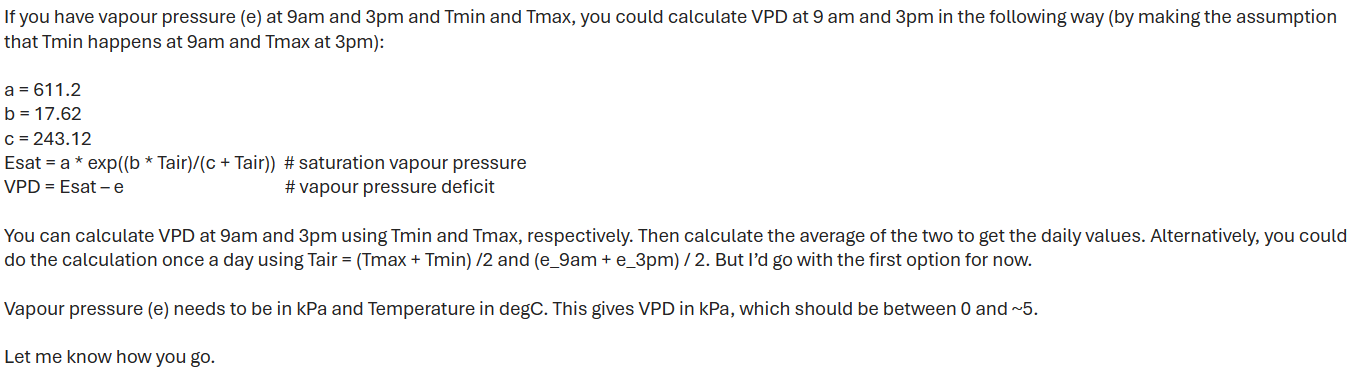

The given vapour pressure is given in hPa (https://portal.ga.gov.au/metadata/australian-gridded-climate-data-agcd-v1/vapour-pressure-h09-mean-monthly/agcd-v1-vapour-pressure-h09-mean-r005-monthly-2020-bom/27e58aaa-ef7b-4273-b59d-f49e88f56ab8). Also, the nc file was inspected in RStudio (see below) which corroborates the units given. So vapour pressure will need to be converted into kPa for this purpose. 

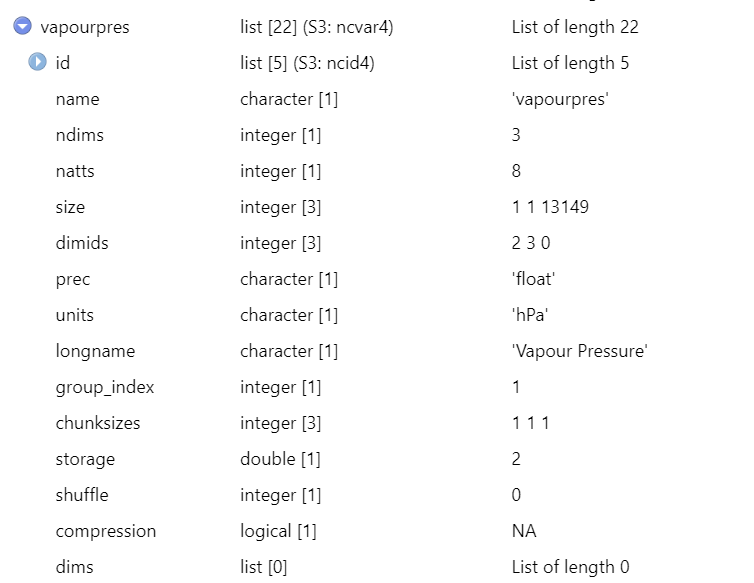

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get a site
site_subset = pd.read_csv("../DATASETS/Sites_Subset_20231010/ausplots_site_info/sites_subset.csv")
site_subset.head()

Unnamed: 0       site_unique site_location_name     established_date  \
0         189  WAAPIL0003-57601         WAAPIL0003  2015-08-30T11:01:10   
1         226  NSABHC0023-57099         NSABHC0023  2014-04-21T00:00:00   
2         300  TCATCH0006-58807         TCATCH0006  2020-02-06T15:29:07   
3         331  WAAGAS0002-58421         WAAGAS0002  2016-08-08T15:32:20   
4         364  NSAMDD0014-56963         NSAMDD0014  2014-06-04T00:00:00   

                                         description bioregion_name  \
0  Millstream Chichester National Park. 200m east...            PIL   
1  Langawirra Station. 11.3km north of homestead....            BHC   
2  Liawenee Moor. 5.4km north west of Miena, 7.5k...            TCH   
3  South Side of track, 10.1km west of abandoned ...            GAS   
4  Scotia Sanctuary. 8kms north of homestead 131 ...            MDD   

  landform_pattern landform_element  site_slope  site_aspect  ...  \
0              RIS              HSL         2.0        270.0  ...   
1              PLA              PLA         0.0          NaN  ...   
2              PLA              PLA         1.0          9.0  ...   
3              FLO              FAN         0.0          NaN  ...   
4              DUN              DUS         1.0          1.0  ...   

  pit_marker_location_method soil_observation_type  \
0                       DGPS                     P   
1                        NaN                     P   
2                     TABLET                     P   
3                        GPS                    PA   
4                        GPS                     P   

                                     a_s_c plot_is_100m_by_100m  \
0                                      NaN                 True   
1                                      NaN                 True   
2  4 FE? AA AF? CD BFMOU (revised edition)                 True   
3                                      NaN                 True   
4                                      NaN                 True   

   plot_is_aligned_to_grid plot_is_permanently_marked   latitude   longitude  \
0                     True                       True -21.541103  117.057006   
1                     True                       True -31.343950  142.136553   
2                     True                       True -41.965805  146.652027   
3                     True                       True -23.384700  120.479139   
4                     True                       True -33.167939  141.191817   

  point state  
0    SW    WA  
1    SW   NSW  
2    SW   TAS  
3    SW    WA  
4    SW   NSW  

[5 rows x 44 columns]

In [3]:
## Lets try WAAPIL0003
site_location_name = 'WAAPIL0003'

In [4]:
file_name = f'{site_location_name}_1987_2022.csv'
# tmin
tmin = pd.read_csv(f'../DATASETS/Climate_Gridded/tmin/{file_name}', usecols = ['tmin', 'time'], parse_dates = ['time']).copy()

# tmax 
tmax = pd.read_csv(f'../DATASETS/Climate_Gridded/tmax/{file_name}', usecols = ['tmax', 'time'], parse_dates = ['time']).copy()

# vapourpres_09
vapourpres_h09 = pd.read_csv(f'../DATASETS/Climate_Gridded/vapourpres_h09/{file_name}', usecols = ['vapourpres_h09', 'time'], parse_dates = ['time']).copy()
vapourpres_h09['vapourpres_h09'] = vapourpres_h09['vapourpres_h09']/10 # divide by 10 to get kPa

# vapourpres_15
vapourpres_h15 = pd.read_csv(f'../DATASETS/Climate_Gridded/vapourpres_h15/{file_name}', usecols = ['vapourpres_h15', 'time'], parse_dates = ['time']).copy()
vapourpres_h15['vapourpres_h15'] = vapourpres_h15['vapourpres_h15']/10 # divide by 10 to get kPa


In [5]:
climate_data = tmin.copy().merge(tmax, left_on = 'time', right_on = 'time').merge(vapourpres_h09, left_on = 'time', right_on = 'time').\
    merge(vapourpres_h15, left_on = 'time', right_on = 'time')
climate_data = climate_data.sort_values('time')
climate_data.set_index('time', inplace = True)

climate_data.head()

tmin       tmax  vapourpres_h09  vapourpres_h15
time                                                            
1987-01-01  26.447266  43.898438        0.565137        1.072461
1987-01-02  26.397461  44.227539        2.220117        1.123535
1987-01-03  28.107422  41.057617        2.292090        1.829492
1987-01-04  26.827148  40.477539        1.717090        1.769531
1987-01-05  24.216797  39.887695        2.181055        1.602539

In [6]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13149 entries, 1987-01-01 to 2022-12-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmin            13149 non-null  float64
 1   tmax            13149 non-null  float64
 2   vapourpres_h09  13149 non-null  float64
 3   vapourpres_h15  13149 non-null  float64
dtypes: float64(4)
memory usage: 513.6 KB


In [7]:
climate_data.describe()

tmin          tmax  vapourpres_h09  vapourpres_h15
count  13149.000000  13149.000000    13149.000000    13149.000000
mean      19.196852     33.799877        1.405101        1.313938
std        5.454379      5.813718        0.711047        0.629428
min        3.472656     15.260742        0.000000        0.000000
25%       14.695312     28.940430        0.817187        0.810254
50%       19.778320     34.382812        1.303320        1.220898
75%       23.887695     38.422852        1.942676        1.765430
max       31.938477     51.797852        3.287695        3.245410

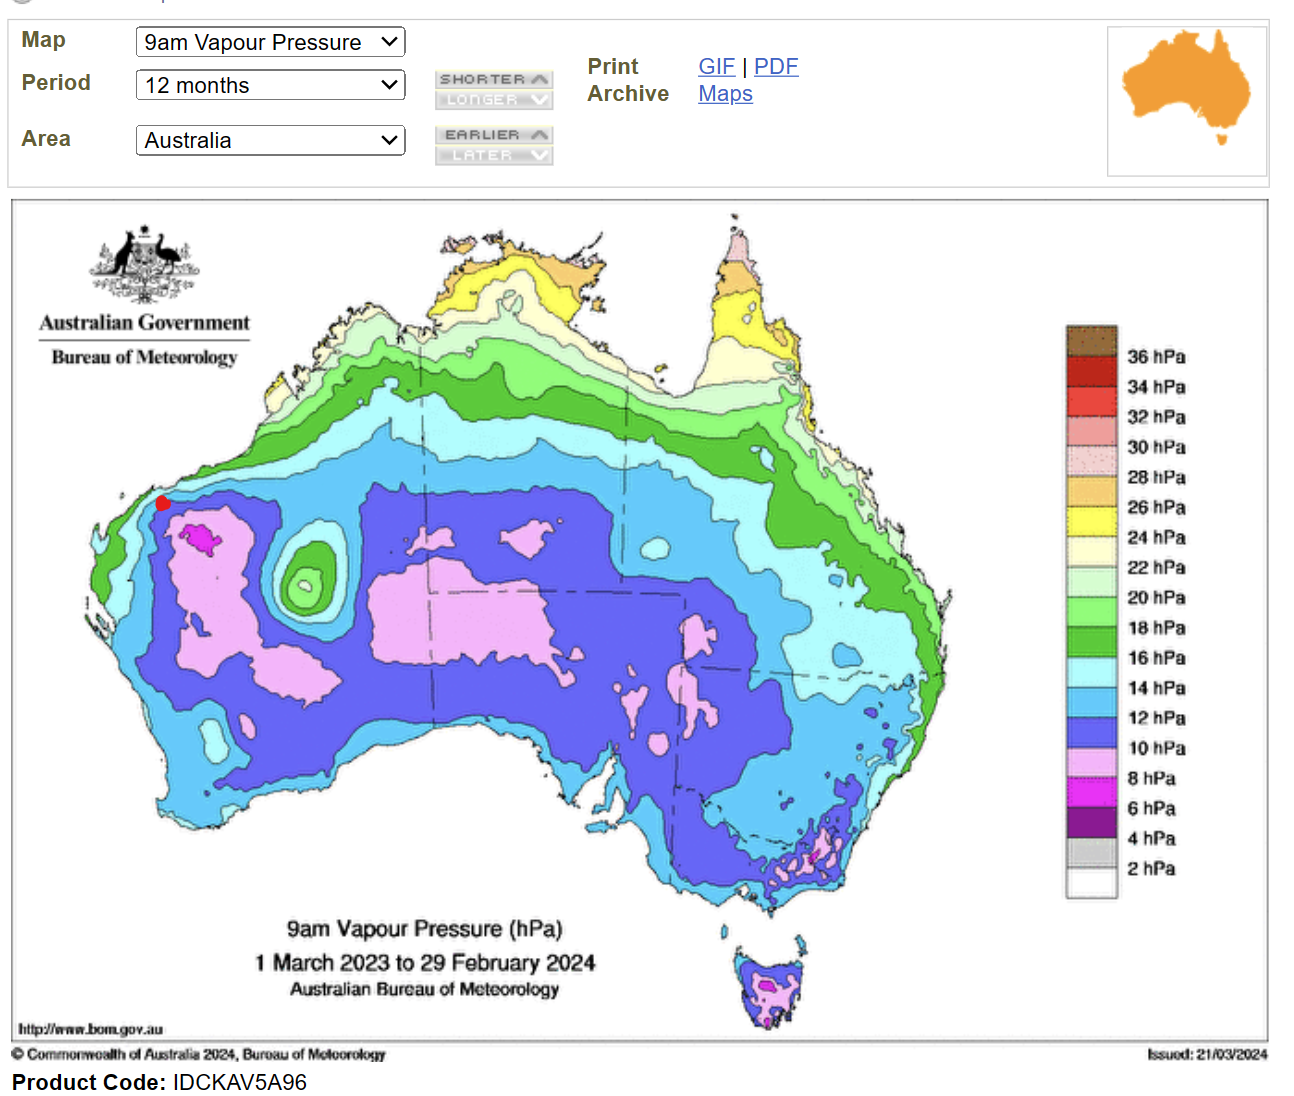
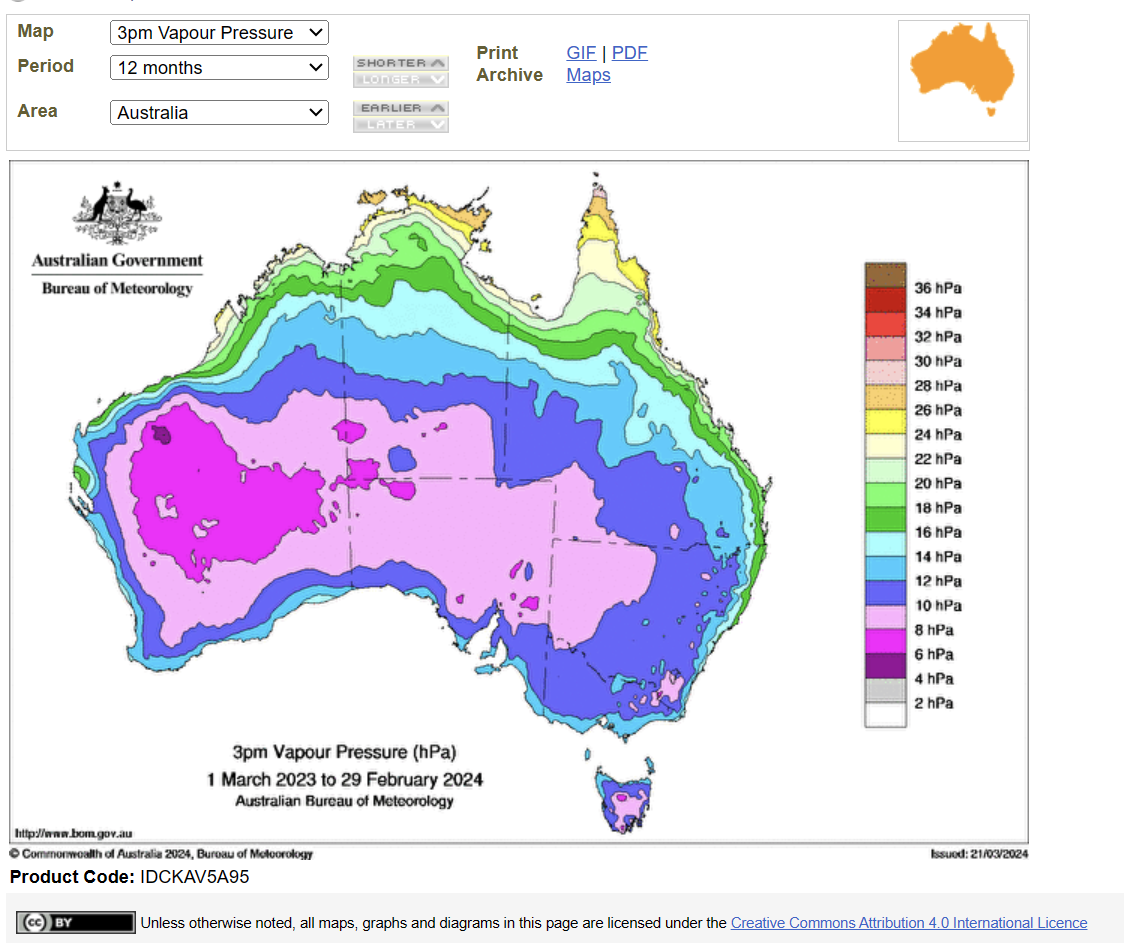
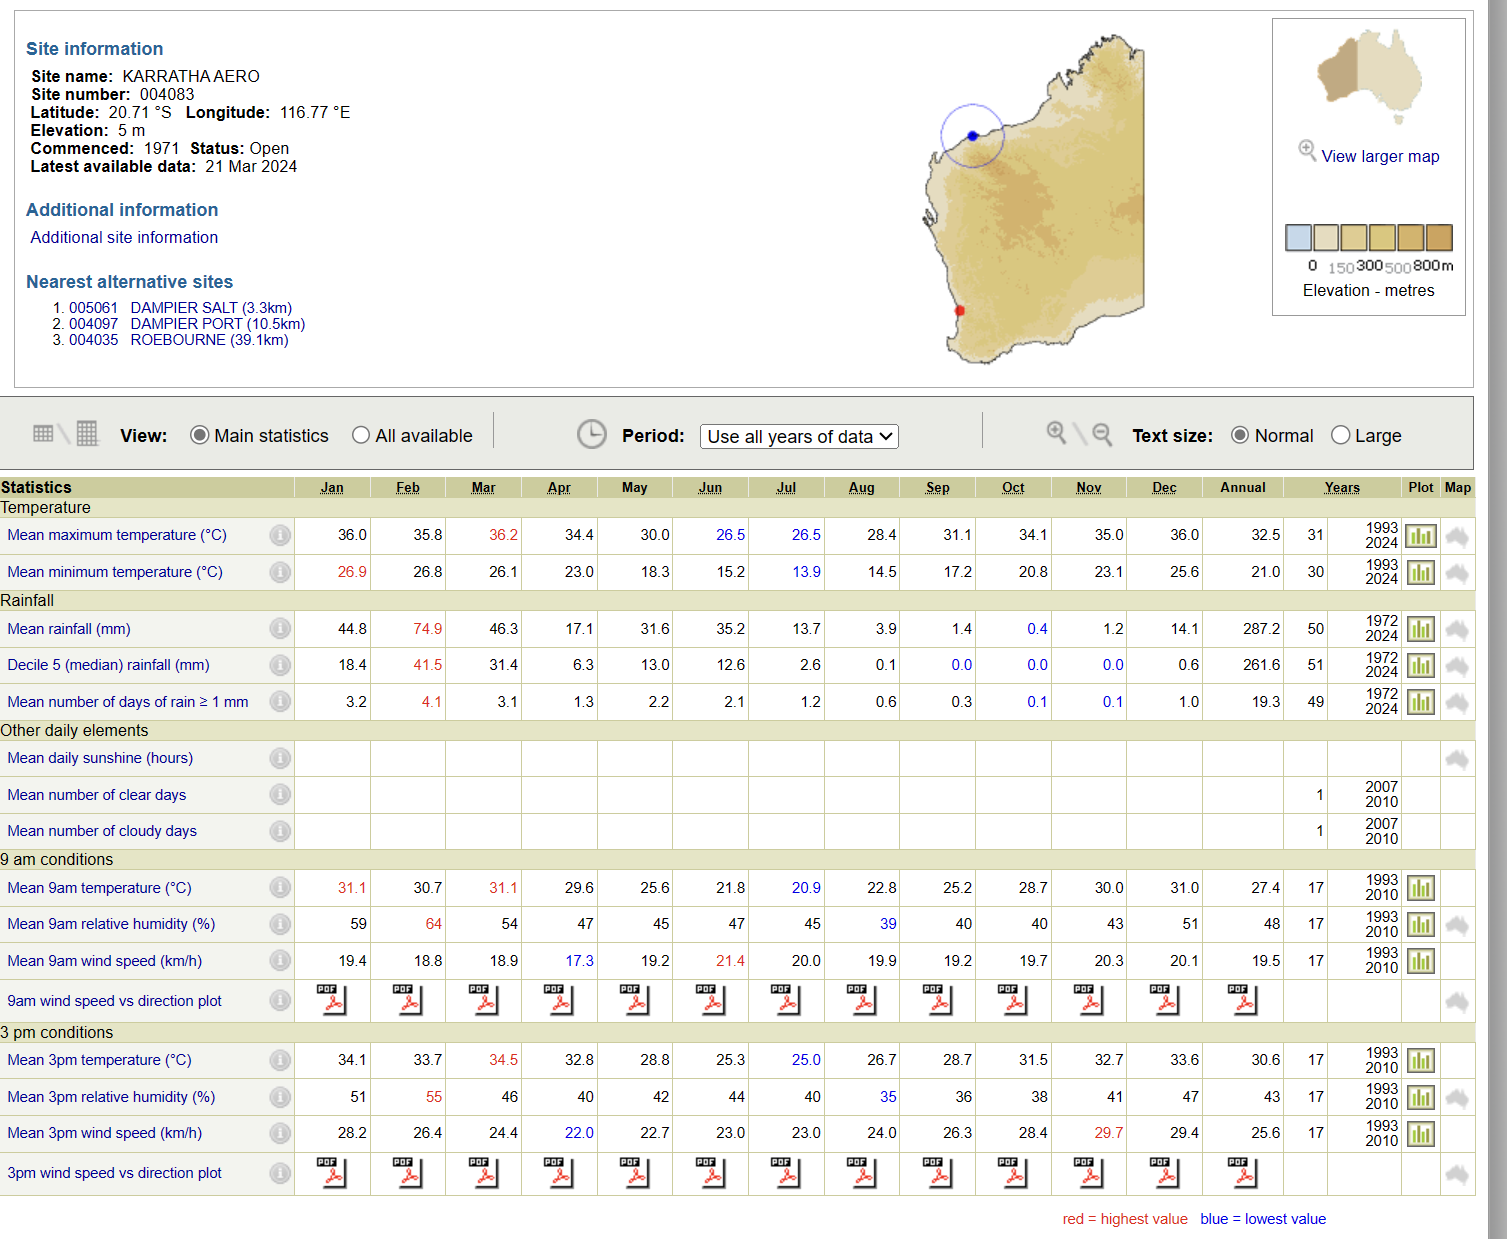
The temperatures an vapour pressures appear to have expected values.

<Axes: xlabel='time'>

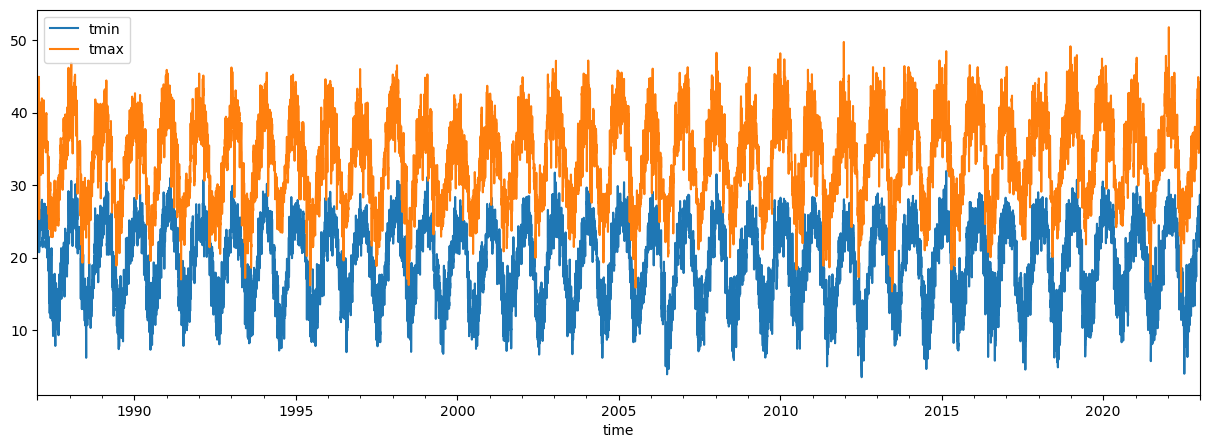

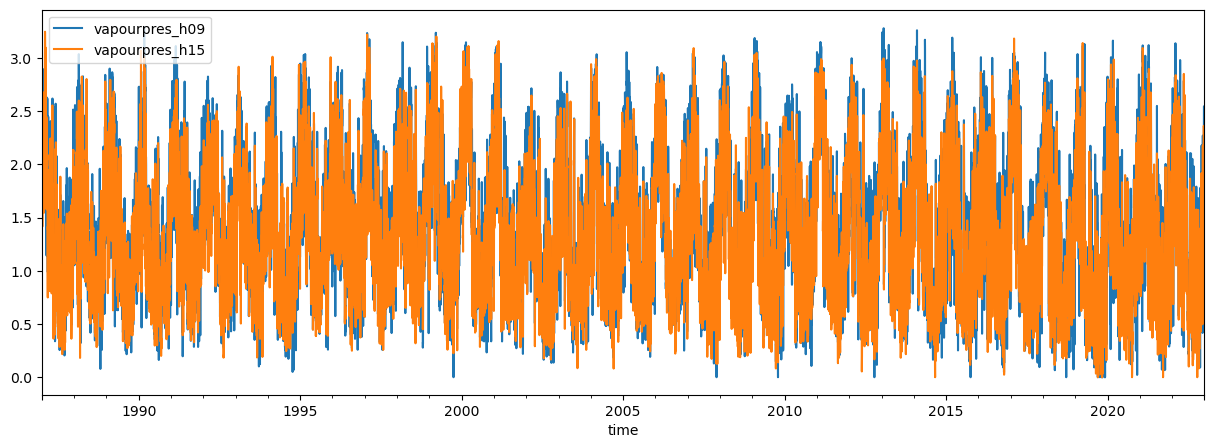

In [8]:
climate_data.plot(y = ['tmin', 'tmax'], figsize = (15,5))
climate_data.plot(y = ['vapourpres_h09', 'vapourpres_h15'], figsize = (15,5))

The climate variables are behaving as expected, continue with calculation. 

## Now calculate the VPD

In [9]:
# The coefficients
a = 611.2
b = 17.62
c = 243.12

In [10]:
Esat_9am = a*np.exp(
    (b * climate_data['tmin'])/
    (c + climate_data['tmin'])
)/1000

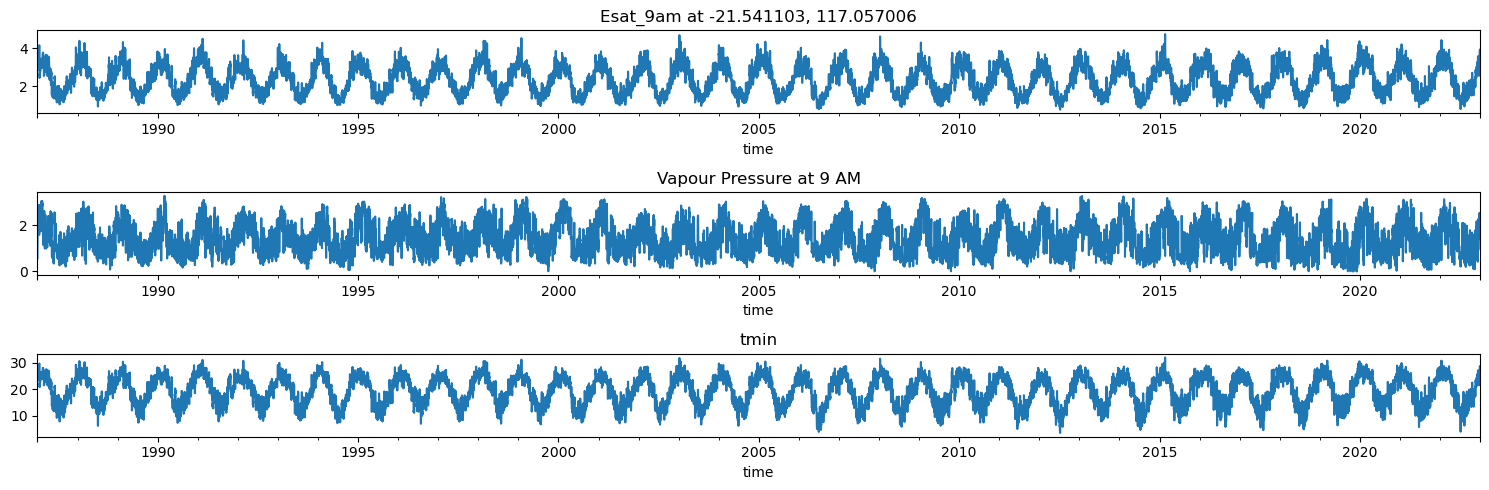

In [11]:
# Plot Datasets 
fig, ax = plt.subplots(3, figsize = (15,10))
Esat_9am.plot(figsize = (15,5), title = f'Esat_9am at {-21.541103}, {117.057006}', ax = ax[0]) # Plot Esat 
climate_data['vapourpres_h09'].plot(title = 'Vapour Pressure at 9 AM', ax = ax[1]) # Plot vapourpres_h09
climate_data['tmin'].plot(title = 'tmin', ax = ax[2]) # plot tmin 
fig.tight_layout()

In [12]:
# Now Calculate VPD at 9am
VPD_9am = Esat_9am - climate_data['vapourpres_h09']

In [13]:
VPD_9am.describe()

count    13149.000000
mean         0.924751
std          0.612544
min         -0.663612
25%          0.506437
50%          0.859395
75%          1.272861
max          4.060682
dtype: float64

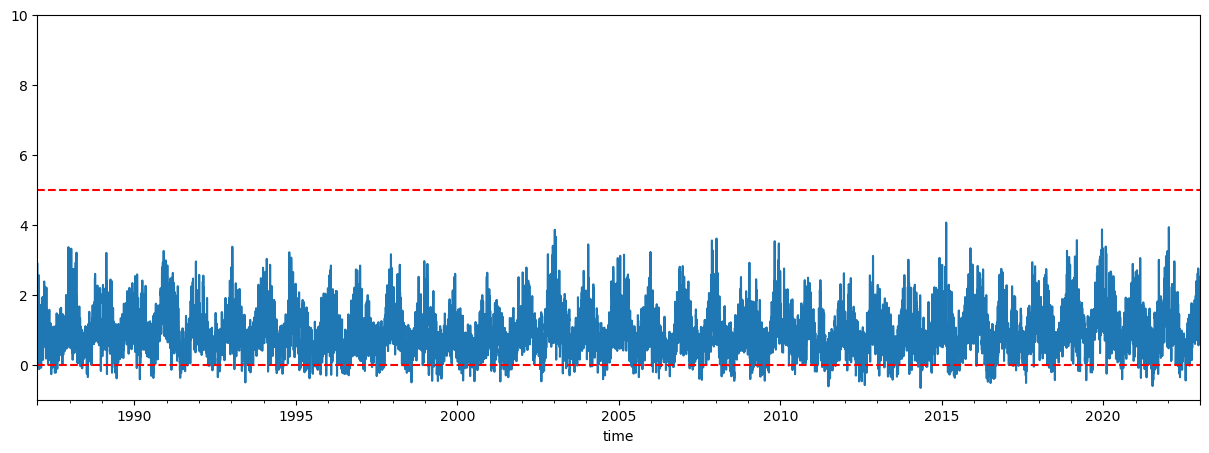

In [14]:
VPD_9am.plot(figsize = (15,5), ylim = (-1,10))
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y= 5, color='r', linestyle='--')

In [15]:
Esat_3pm = a*np.exp(
    (b * climate_data['tmax'])/
    (c + climate_data['tmax'])
)/1000

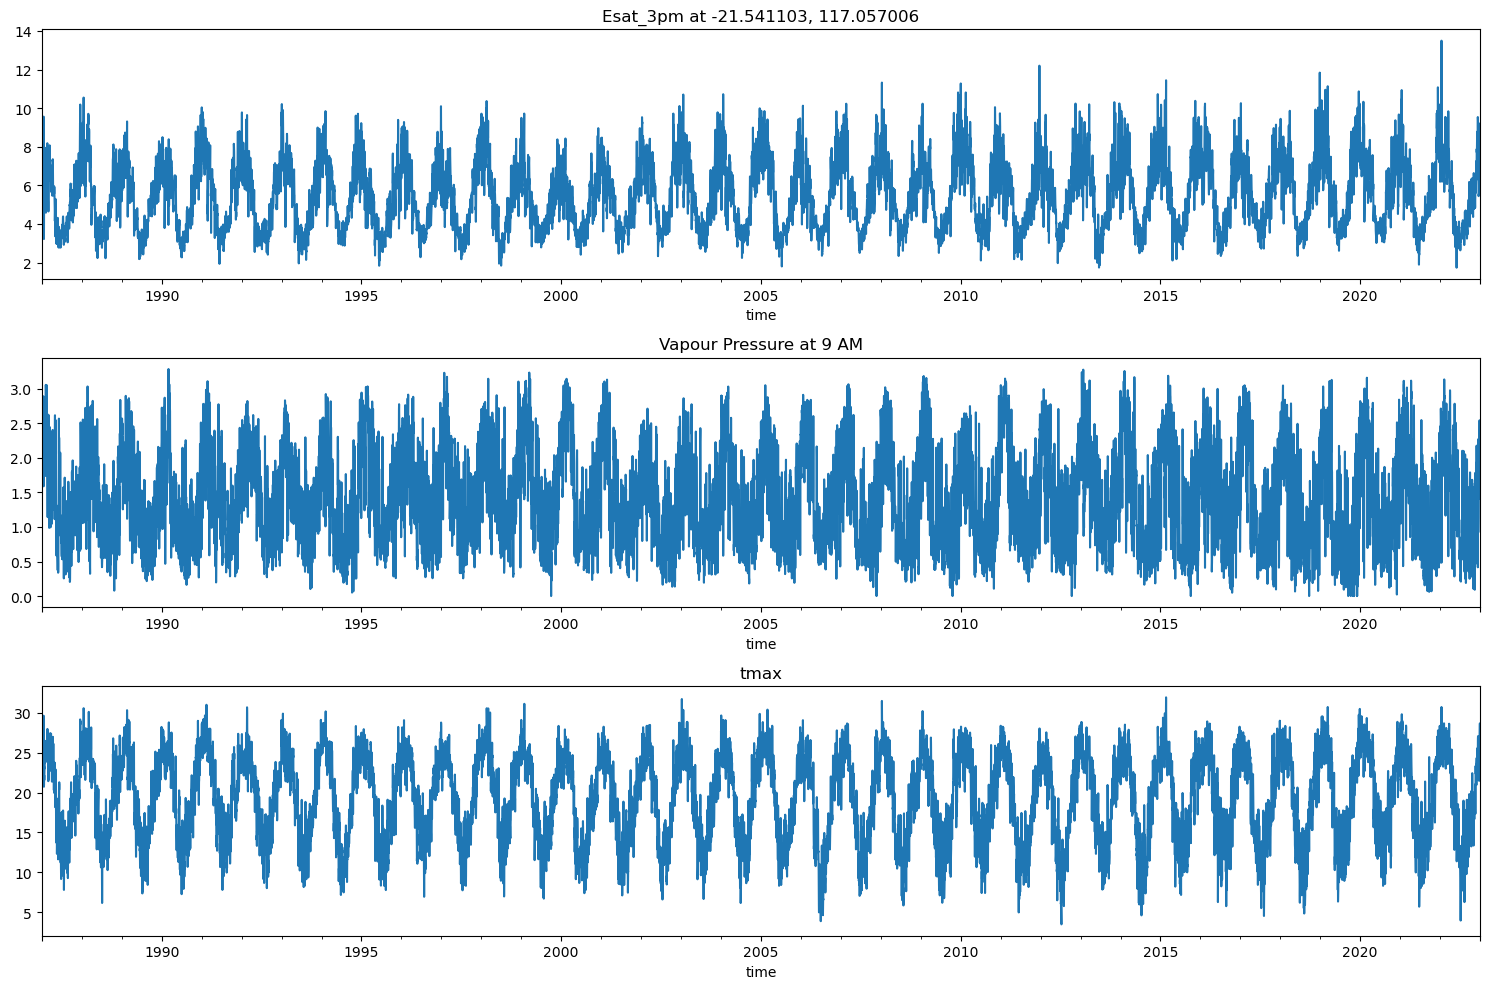

In [16]:
# Plot for 3pm
fig, ax = plt.subplots(3, figsize = (15,10))
Esat_3pm.plot(title = f'Esat_3pm at {-21.541103}, {117.057006}', ax = ax[0])
climate_data['vapourpres_h09'].plot(title = 'Vapour Pressure at 9 AM', ax = ax[1])
climate_data['tmin'].plot(title = 'tmax', ax = ax[2])
fig.tight_layout()

In [17]:
VPD_3pm = Esat_3pm - climate_data['vapourpres_h15']

In [18]:
VPD_3pm.describe()

count    13149.000000
mean         4.176789
std          1.642384
min          0.083453
25%          2.928812
50%          4.001599
75%          5.280693
max         12.808958
dtype: float64

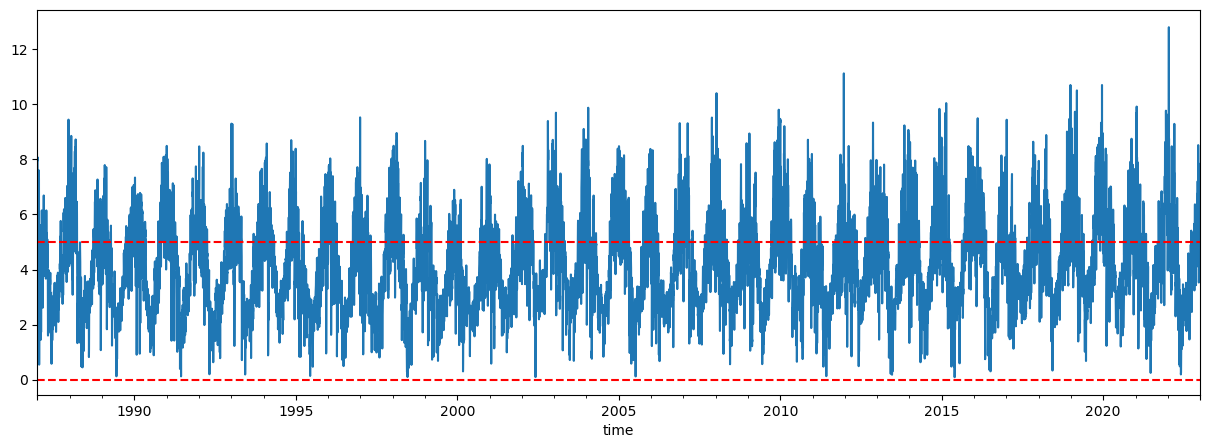

In [19]:
VPD_3pm.plot(figsize = (15,5))
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle='--')

In [20]:
VPD = (VPD_9am + VPD_3pm)/2

In [21]:
VPD.describe()

count    13149.000000
mean         2.550770
std          1.068200
min         -0.058092
25%          1.768273
50%          2.419096
75%          3.232384
max          8.369738
dtype: float64

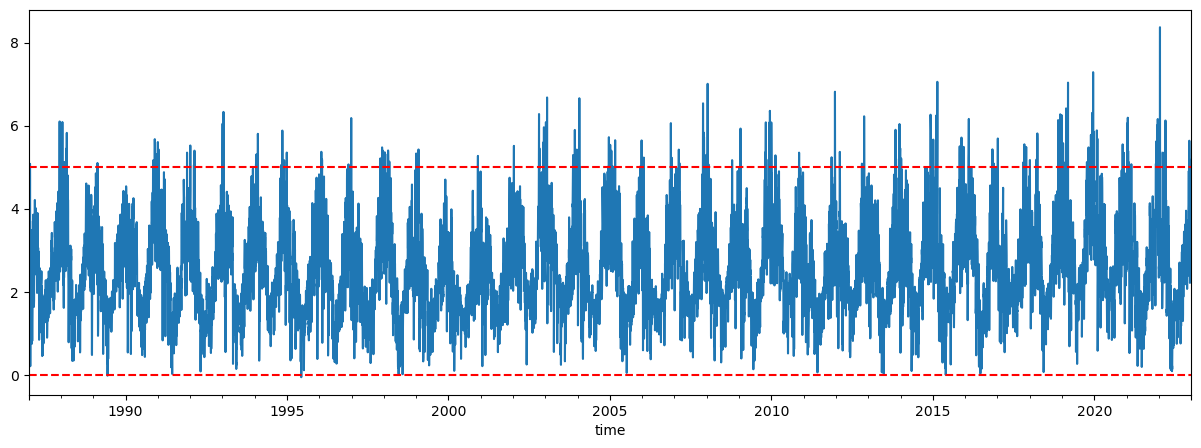

In [22]:
VPD.plot(figsize = (15,5))
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle='--')

The VPD violates the constraint that it should be above 0. In my actual data preprocessing pipeline, the VPD is the following:

In [23]:
input_data_WAAPIL0003 = pd.read_csv('Input_DataSet_WAAPIL0003.csv', parse_dates = ['time']).copy()
input_data_WAAPIL0003 = input_data_WAAPIL0003.sort_values('time')
input_data_WAAPIL0003.set_index('time', inplace= True)
input_data_WAAPIL0003.head()

Unnamed: 0         x          y         bs        pv        npv  \
time                                                                          
1987-09-04         1.0  505945.0  7618115.0  39.206612  8.181818  51.264463   
1987-09-20         1.5  505945.0  7618115.0  38.698347  8.665289  51.264463   
1987-10-06         2.0  505945.0  7618115.0  38.190083  9.148760  51.264463   
1987-10-22         3.0  505945.0  7618115.0  35.768595  7.611570  55.190083   
1987-11-07         3.5  505945.0  7618115.0  37.479339  6.830579  54.165289   

                   ue  spatial_ref  pv_filter  npv_filter  ...  tmin_rolling  \
time                                                       ...                 
1987-09-04  10.231405      28350.0   8.345991   51.146632  ...           NaN   
1987-09-20  10.041322      28350.0   8.751850   51.261804  ...           NaN   
1987-10-06   9.851240      28350.0   8.373091   52.142329  ...           NaN   
1987-10-22   9.776860      28350.0   7.701949   53.320103  ...           NaN   
1987-11-07   9.913223      28350.0   7.114724   54.437294  ...           NaN   

            vapourpres_h09  vapourpres_h09_cv  vapourpres_h09_sum  \
time                                                                
1987-09-04        5.143250           0.285386          102.324097   
1987-09-20       11.322510           0.285386          102.324097   
1987-10-06       14.288513           0.285386          102.324097   
1987-10-22       12.349548           0.285386          102.324097   
1987-11-07       13.974487           0.285386          102.324097   

            vapourpres_h09_rolling  vapourpres_h15  vapourpres_h15_cv  \
time                                                                    
1987-09-04                     NaN        6.126770           0.275282   
1987-09-20                     NaN        9.809082           0.275282   
1987-10-06                     NaN       11.612854           0.275282   
1987-10-22                     NaN        9.201721           0.275282   
1987-11-07                     NaN       11.554993           0.275282   

            vapourpres_h15_sum  vapourpres_h15_rolling       VPD  
time                                                              
1987-09-04           88.736328                     NaN  2.587931  
1987-09-20           88.736328                     NaN  2.536063  
1987-10-06           88.736328                     NaN  2.166326  
1987-10-22           88.736328                     NaN  2.977671  
1987-11-07           88.736328                     NaN  2.958083  

[5 rows x 45 columns]

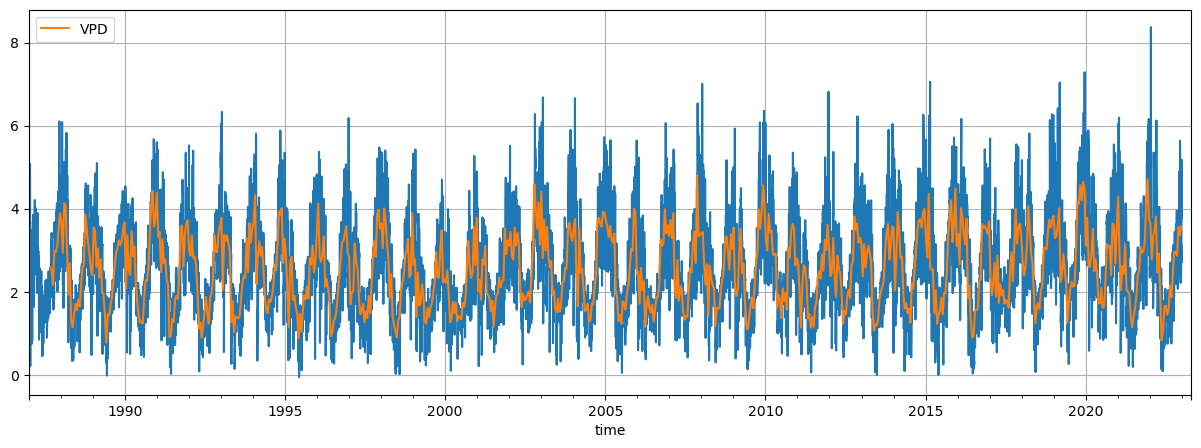

In [24]:
fig, ax = plt.subplots(1)
VPD.plot(figsize = (15,5), ax = ax)
input_data_WAAPIL0003.plot(y = 'VPD', figsize = (15,5), ax = ax)
plt.grid(True)

In [25]:
# calc avg temp and vapourpres
average_temp = (climate_data['tmin'] + climate_data['tmax'])/2
average_vapour_pres = (climate_data['vapourpres_h09'] + climate_data['vapourpres_h15'])/2

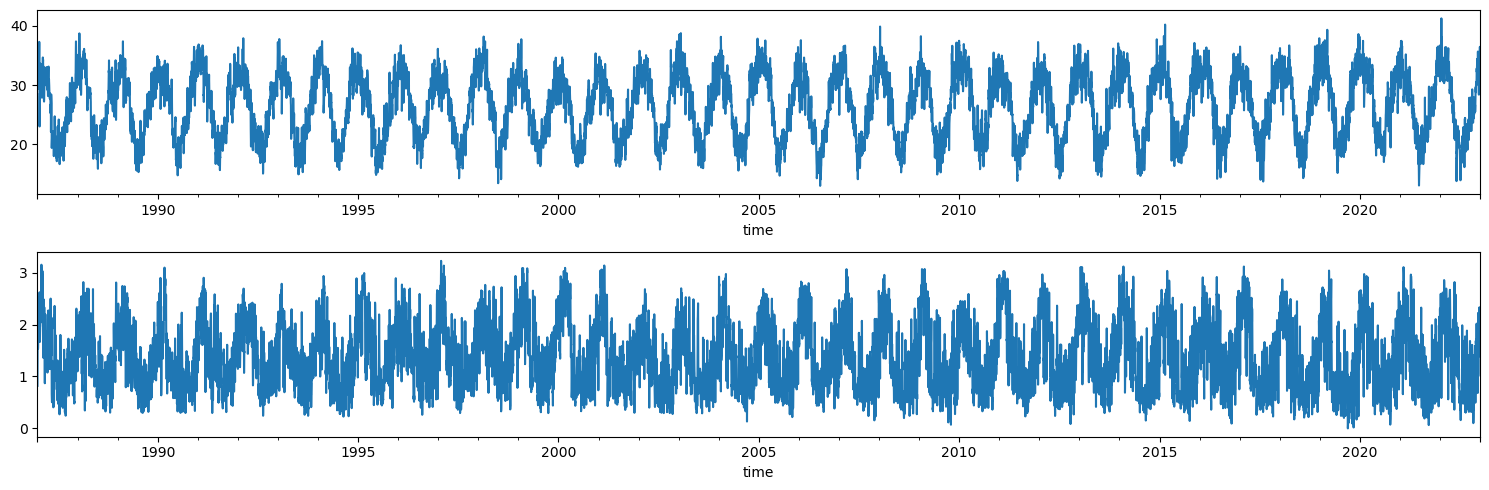

In [26]:
fig, ax = plt.subplots(2, figsize = (15,5))
average_temp.plot(ax = ax[0])
average_vapour_pres.plot(ax = ax[1])
fig.tight_layout()

<Axes: title={'center': 'Esat at -21.541103, 117.057006'}, xlabel='time'>

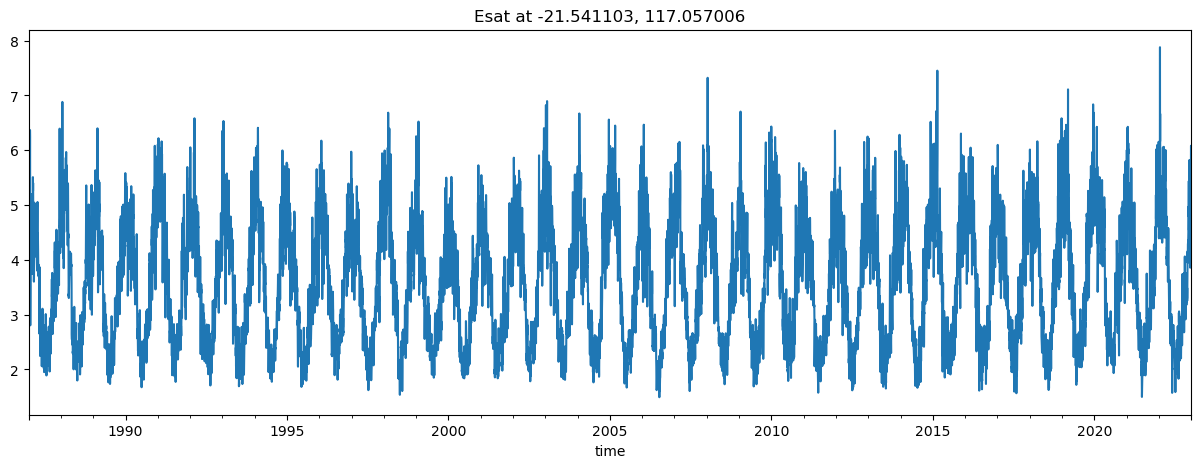

In [27]:
Esat = a*np.exp((b*average_temp)/(c+ average_temp))/1000
Esat.plot(figsize = (15,5), title = f'Esat at {-21.541103}, {117.057006}')

In [28]:
VPD_avg = Esat - average_vapour_pres

In [29]:
VPD_avg.describe()

count    13149.000000
mean         2.243928
std          0.943237
min         -0.086634
25%          1.546320
50%          2.134909
75%          2.856533
max          7.294403
dtype: float64

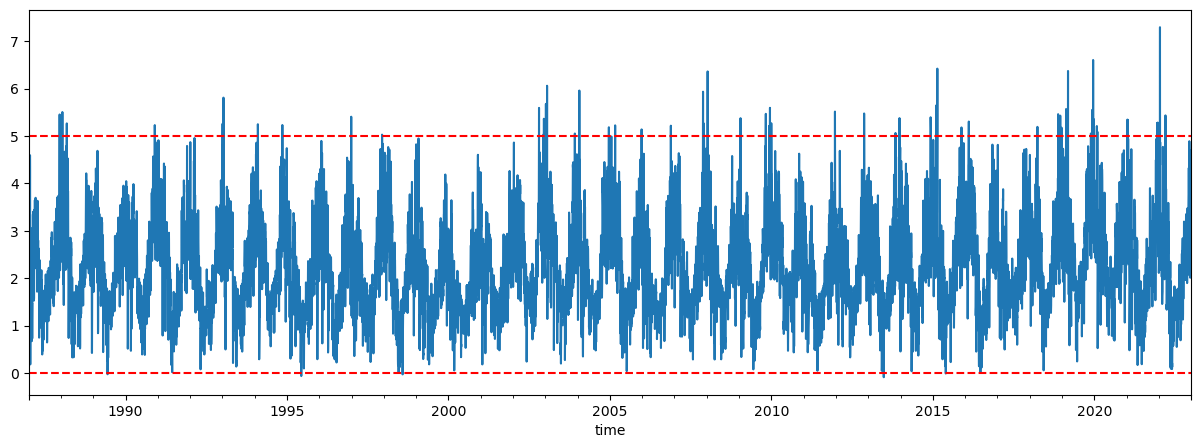

In [30]:
VPD_avg.plot(figsize = (15,5))
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle='--')

## Trying a different site

In [31]:
site_location_name = 'NSABHC0023' # -31.343950, 142.136553

file_name = f'{site_location_name}_1987_2022.csv'
# tmin
tmin = pd.read_csv(f'../DATASETS/Climate_Gridded/tmin/{file_name}', usecols = ['tmin', 'time'], parse_dates = ['time']).copy()
tmin.set_index('time', inplace = True)

# tmax 
tmax = pd.read_csv(f'../DATASETS/Climate_Gridded/tmax/{file_name}', usecols = ['tmax', 'time'], parse_dates = ['time']).copy()
tmax.set_index('time', inplace = True)

# vapourpres_09
vapourpres_h09 = pd.read_csv(f'../DATASETS/Climate_Gridded/vapourpres_h09/{file_name}', usecols = ['vapourpres_h09', 'time'], parse_dates = ['time']).copy()
vapourpres_h09['vapourpres_h09'] = vapourpres_h09['vapourpres_h09']/10 # divide by 10 to get kPa
vapourpres_h09.set_index('time', inplace = True)

# vapourpres_15
vapourpres_h15 = pd.read_csv(f'../DATASETS/Climate_Gridded/vapourpres_h15/{file_name}', usecols = ['vapourpres_h15', 'time'], parse_dates = ['time']).copy()
vapourpres_h15['vapourpres_h15'] = vapourpres_h15['vapourpres_h15']/10 # divide by 10 to get kPa
vapourpres_h15.set_index('time', inplace = True)

climate_data = tmin.copy().merge(tmax, left_index = True, right_index = True).merge(vapourpres_h09, left_index = True, right_index = True).\
    merge(vapourpres_h15, left_index = True, right_index = True)

In [32]:
climate_data.head()

tmin       tmax  vapourpres_h09  vapourpres_h15
time                                                            
1987-01-01  15.291016  32.135742        1.474512        1.288379
1987-01-02  17.831055  37.896484        0.692480        0.592383
1987-01-03  13.500977  26.196289        1.171484        1.103418
1987-01-04  16.331055  28.305664        1.239453        1.202441
1987-01-05  15.951172  33.715820        1.432520        1.183398

In [33]:
climate_data.describe()

tmin          tmax  vapourpres_h09  vapourpres_h15
count  13149.000000  13149.000000    13149.000000    13149.000000
mean      12.807693     26.509167        1.059133        0.945639
std        6.836211      7.838128        0.379332        0.369210
min       -3.199219      7.028320        0.259082        0.132520
25%        7.155273     19.843750        0.811230        0.699414
50%       12.488281     26.022461        0.972070        0.866992
75%       17.956055     32.631836        1.212695        1.098340
max       35.281250     47.986328        3.056543        3.146387

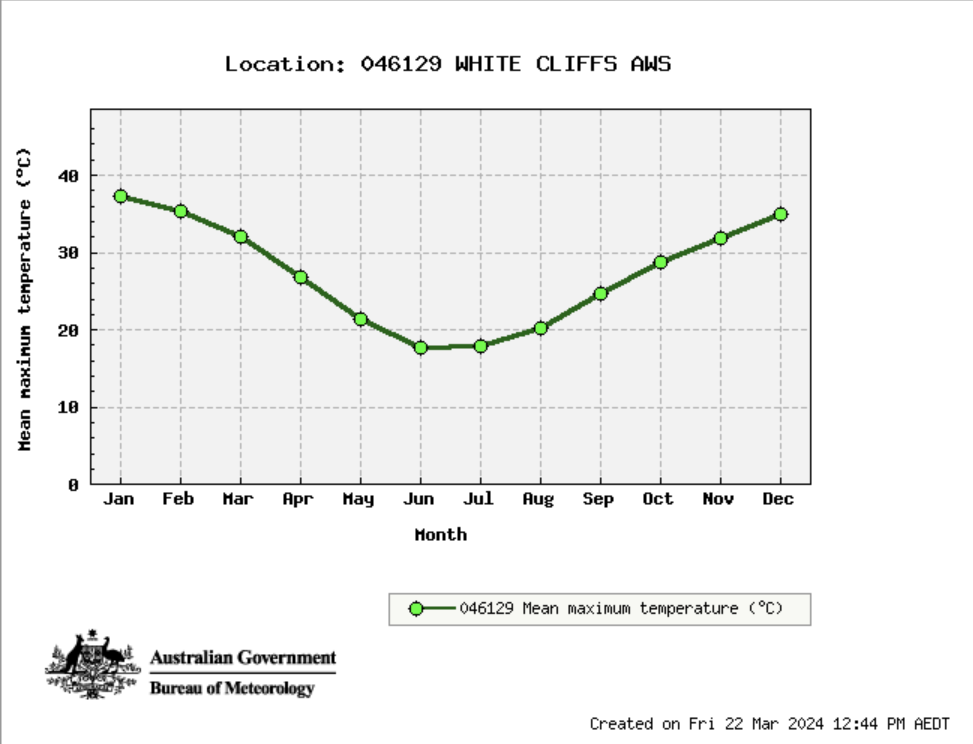

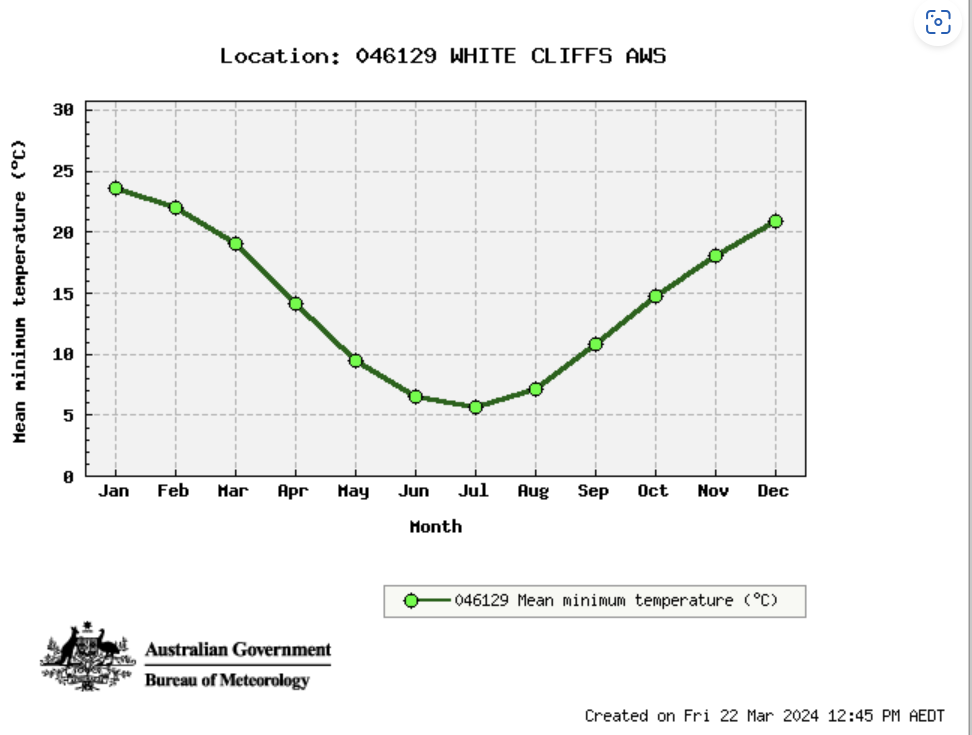

<Axes: xlabel='time'>

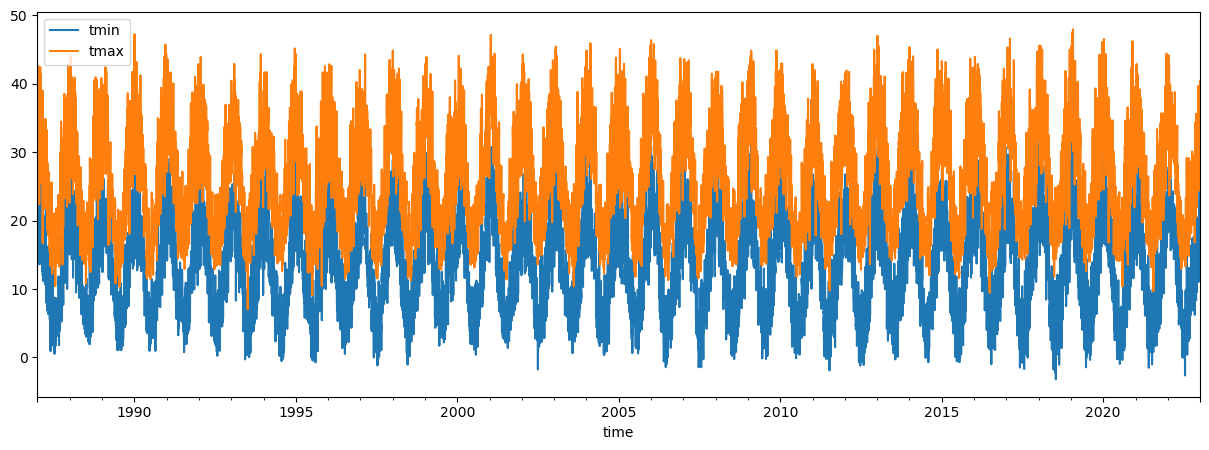

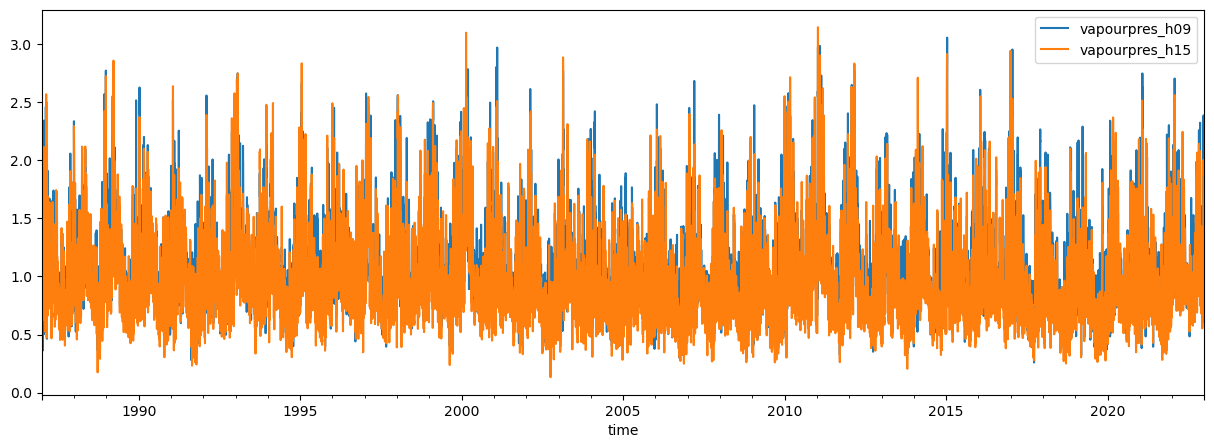

In [34]:
climate_data.plot(y = ['tmin', 'tmax'], figsize = (15,5))
climate_data.plot(y = ['vapourpres_h09', 'vapourpres_h15'], figsize = (15,5))

In [35]:
Esat_9am = a*np.exp(
    (b * climate_data['tmin'])/
    (c + climate_data['tmin'])
)/1000
# Now Calculate VPD at 9am
VPD_9am = Esat_9am - climate_data['vapourpres_h09']

In [36]:
VPD_9am.describe()

count    13149.000000
mean         0.552527
std          0.642316
min         -0.602396
25%          0.048598
50%          0.377810
75%          0.890777
max          4.474397
dtype: float64

<Axes: xlabel='time'>

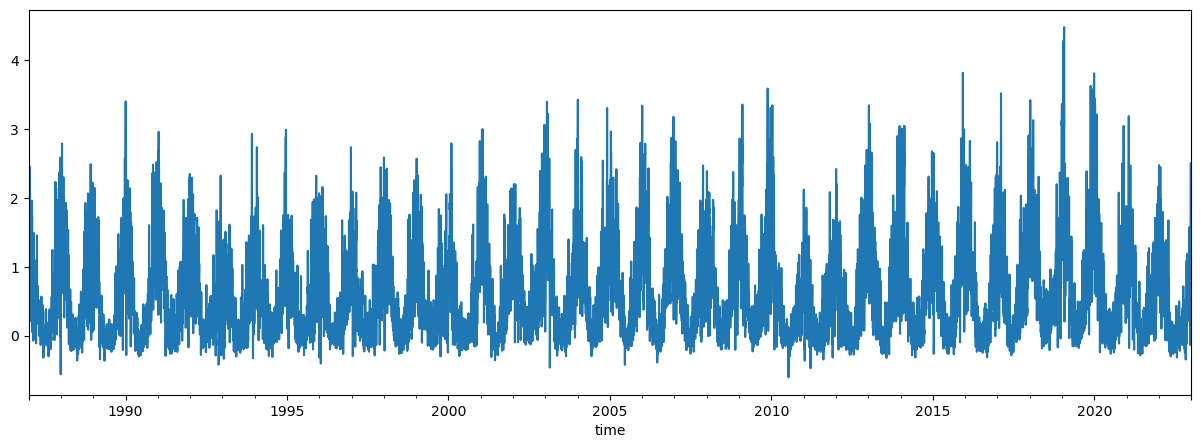

In [37]:
VPD_9am.plot(figsize = (15,5))

In [38]:
Esat_3pm = a*np.exp(
    (b * climate_data['tmax'])/
    (c + climate_data['tmax'])
)/1000
VPD_3pm = Esat_3pm - climate_data['vapourpres_h15']

In [39]:
VPD_3pm.describe()

count    13149.000000
mean         2.846061
std          1.761039
min         -0.057264
25%          1.434565
50%          2.416147
75%          3.913408
max         10.314807
dtype: float64

<Axes: xlabel='time'>

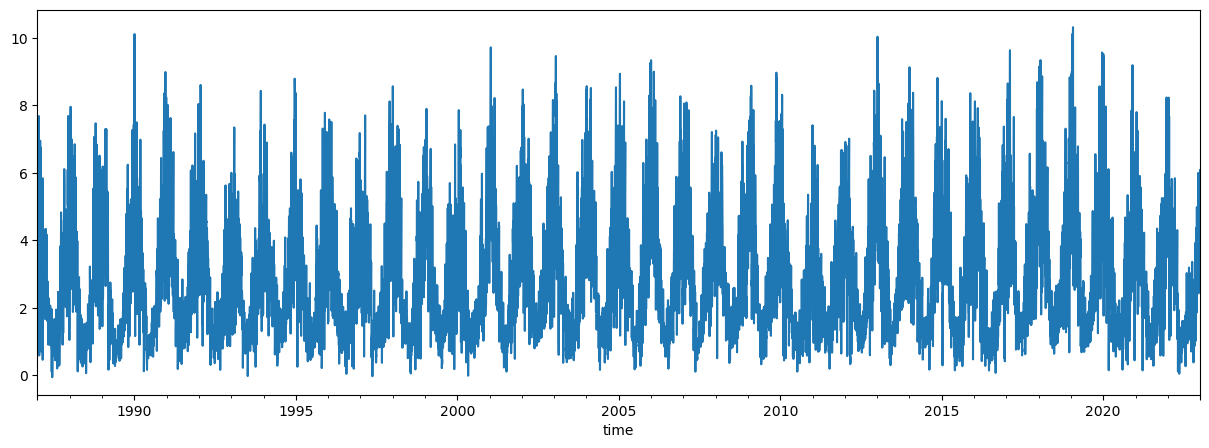

In [40]:
VPD_3pm.plot(figsize = (15,5))

In [41]:
VPD = (VPD_9am + VPD_3pm)/2

In [42]:
VPD.describe()

count    13149.000000
mean         1.699294
std          1.172651
min         -0.246153
25%          0.745707
50%          1.403545
75%          2.389962
max          7.394602
dtype: float64

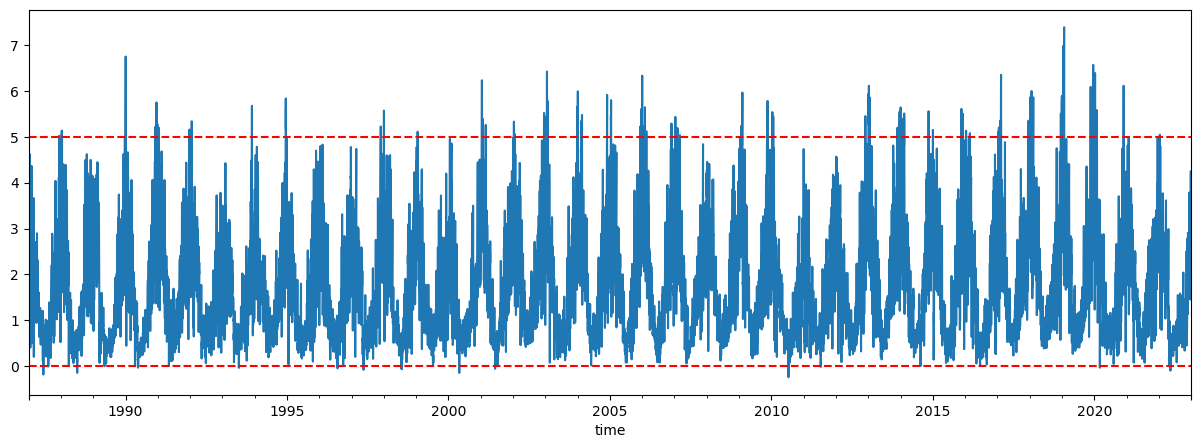

In [43]:
VPD.plot(figsize = (15,5))
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle='--')

In [44]:
# calc avg temp and vapourpres
average_temp = (climate_data['tmin'] + climate_data['tmax'])/2
average_vapour_pres = (climate_data['vapourpres_h09'] + climate_data['vapourpres_h15'])/2
Esat = a*np.exp(
    (b*average_temp)/
    (c+ average_temp)
)/1000
VPD_avg = Esat - average_vapour_pres

In [45]:
VPD_avg.describe()

count    13149.000000
mean         1.484755
std          1.054388
min         -0.317573
25%          0.624506
50%          1.215333
75%          2.095579
max          7.000717
dtype: float64

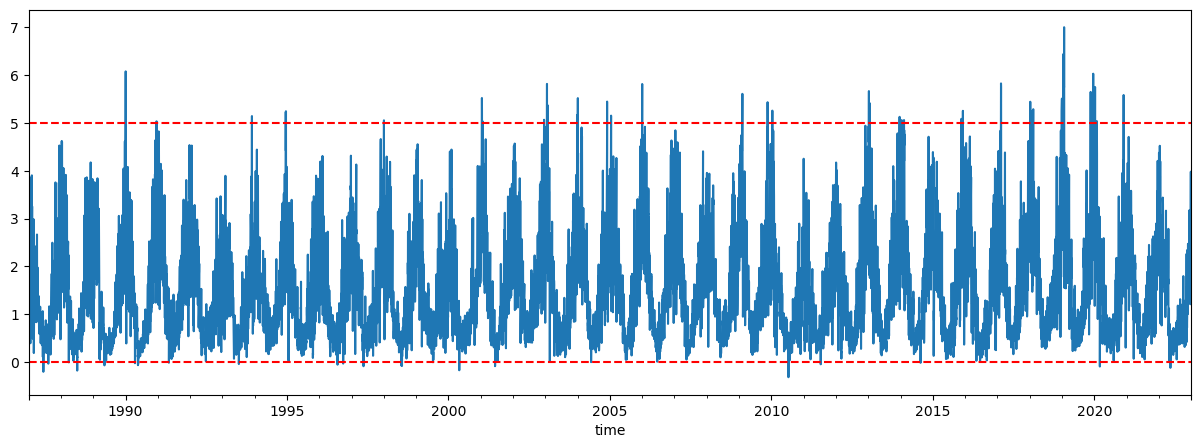

In [46]:
VPD_avg.plot(figsize = (15,5))
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle='--')

## Appendix

http://www.bom.gov.au/climate/austmaps/about-vprp-maps.shtml, BoM calculates vapourpressure based on dewpoint:

$${\mathrm{vapour \space pressure} = e^{1.8096 + \frac{17.269425 \times \mathrm{dewpoint} }{237.3 + \mathrm{dewpoint}}}}$$

In [47]:
def vp(dp):
    return np.exp(1.8096 + (17.269425*dp)/(237.3 + dp))

In [48]:
dps = [i for i in range(40)]
vps = list(map(vp, dps))

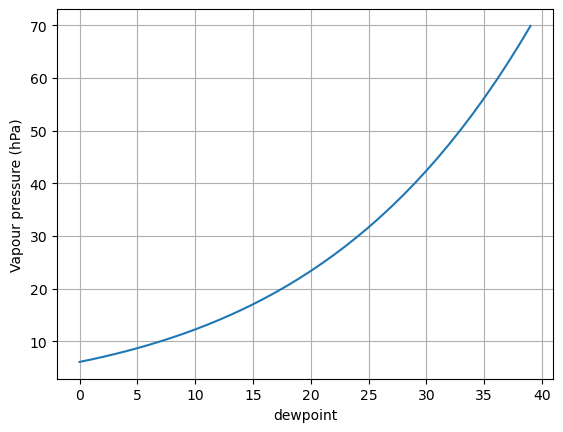

In [49]:
plt.plot(dps, vps)
plt.xlabel('dewpoint')
plt.ylabel('Vapour pressure (hPa)')
plt.grid(True)

In [67]:
import sympy
from sympy import symbols
from sympy import simplify
from sympy import factor

In [68]:
t_min = symbols('t_min')
t_max = symbols('t_max')
vp9 = symbols('v_morning')
vp3 = symbols('v_afternoon')

In [69]:
simplify(a *sympy.exp(b * ((t_min + t_max)/2) / 
                      (c + ((t_min + t_max)/2))))

611.2*exp(17.62*(t_max + t_min)/(t_max + t_min + 486.24))

In [73]:
factor(a* sympy.exp((b*t_min)/(c+t_min))  + a *sympy.exp( (b*t_max)/(c+t_max) ))

611.2*(exp(17.62*t_max/(t_max + 243.12)) + exp(17.62*t_min/(t_min + 243.12)))